In [5]:
pip install prophet


     -------------------------------------- 13.3/13.3 MB 197.1 kB/s eta 0:00:00
     -------------------------------------- 94.4/94.4 kB 673.0 kB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 965.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd
import numpy as np

In [23]:
df = pd.read_csv("energy.csv")
print(df)

                   Datetime  PJME_MW
0       2002-12-31 01:00:00  26498.0
1       2002-12-31 02:00:00  25147.0
2       2002-12-31 03:00:00  24574.0
3       2002-12-31 04:00:00  24393.0
4       2002-12-31 05:00:00  24860.0
...                     ...      ...
145361  2018-01-01 20:00:00  44284.0
145362  2018-01-01 21:00:00  43751.0
145363  2018-01-01 22:00:00  42402.0
145364  2018-01-01 23:00:00  40164.0
145365  2018-01-02 00:00:00  38608.0

[145366 rows x 2 columns]


In [24]:
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Datetime    0
PJME_MW     0
dtype: int64


In [26]:
import pandas as pd
from prophet import Prophet
from matplotlib import pyplot as plt

df.rename(columns={'Datetime': 'ds', 'PJME_MW': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'])

holidays = pd.DataFrame({
  'holiday': 'national_holiday',
  'ds': pd.to_datetime(['2018-01-01', '2019-01-01', '2020-01-01']),
  'lower_window': 0,
  'upper_window': 1,
})

model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,  
    daily_seasonality=True,   
    holidays=holidays,
    seasonality_mode='additive'
)

model.add_seasonality(name='biweekly', period=14, fourier_order=5)

model.fit(df)

future = model.make_future_dataframe(periods=365, freq='H')

forecast = model.predict(future)
print(forecast)

11:59:31 - cmdstanpy - INFO - Chain [1] start processing
12:01:53 - cmdstanpy - INFO - Chain [1] done processing


                        ds         trend    yhat_lower    yhat_upper   
0      2002-01-01 01:00:00  29362.563689  21936.304520  31341.453209  \
1      2002-01-01 02:00:00  29363.205398  20729.067574  29846.221025   
2      2002-01-01 03:00:00  29363.847107  19762.375151  28923.936409   
3      2002-01-01 04:00:00  29364.488817  19375.553729  28934.143048   
4      2002-01-01 05:00:00  29365.130526  20227.756605  29949.140168   
...                    ...           ...           ...           ...   
145722 2018-08-18 01:00:00  30791.360703  25792.507198  35163.585601   
145723 2018-08-18 02:00:00  30791.335190  24538.184601  33886.070986   
145724 2018-08-18 03:00:00  30791.309678  22894.316486  32251.691417   
145725 2018-08-18 04:00:00  30791.284166  22857.855896  32304.085355   
145726 2018-08-18 05:00:00  30791.258653  23506.266779  32949.177632   

         trend_lower   trend_upper  additive_terms  additive_terms_lower   
0       29362.563689  29362.563689    -2625.103760         

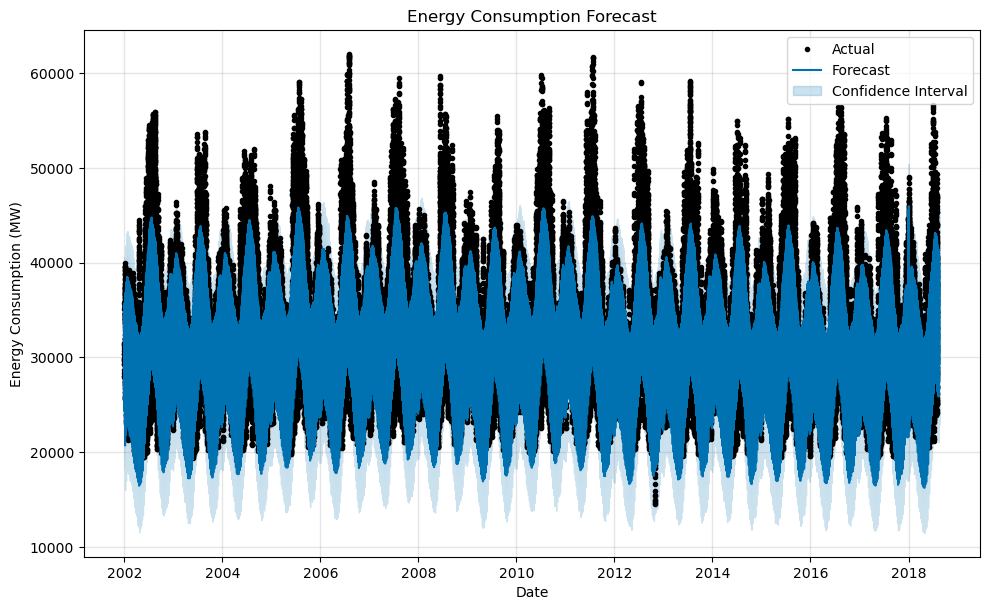

In [27]:
fig1 = model.plot(forecast)
plt.title('Energy Consumption Forecast')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (MW)')
plt.legend(['Actual', 'Forecast', 'Confidence Interval'])
plt.show()

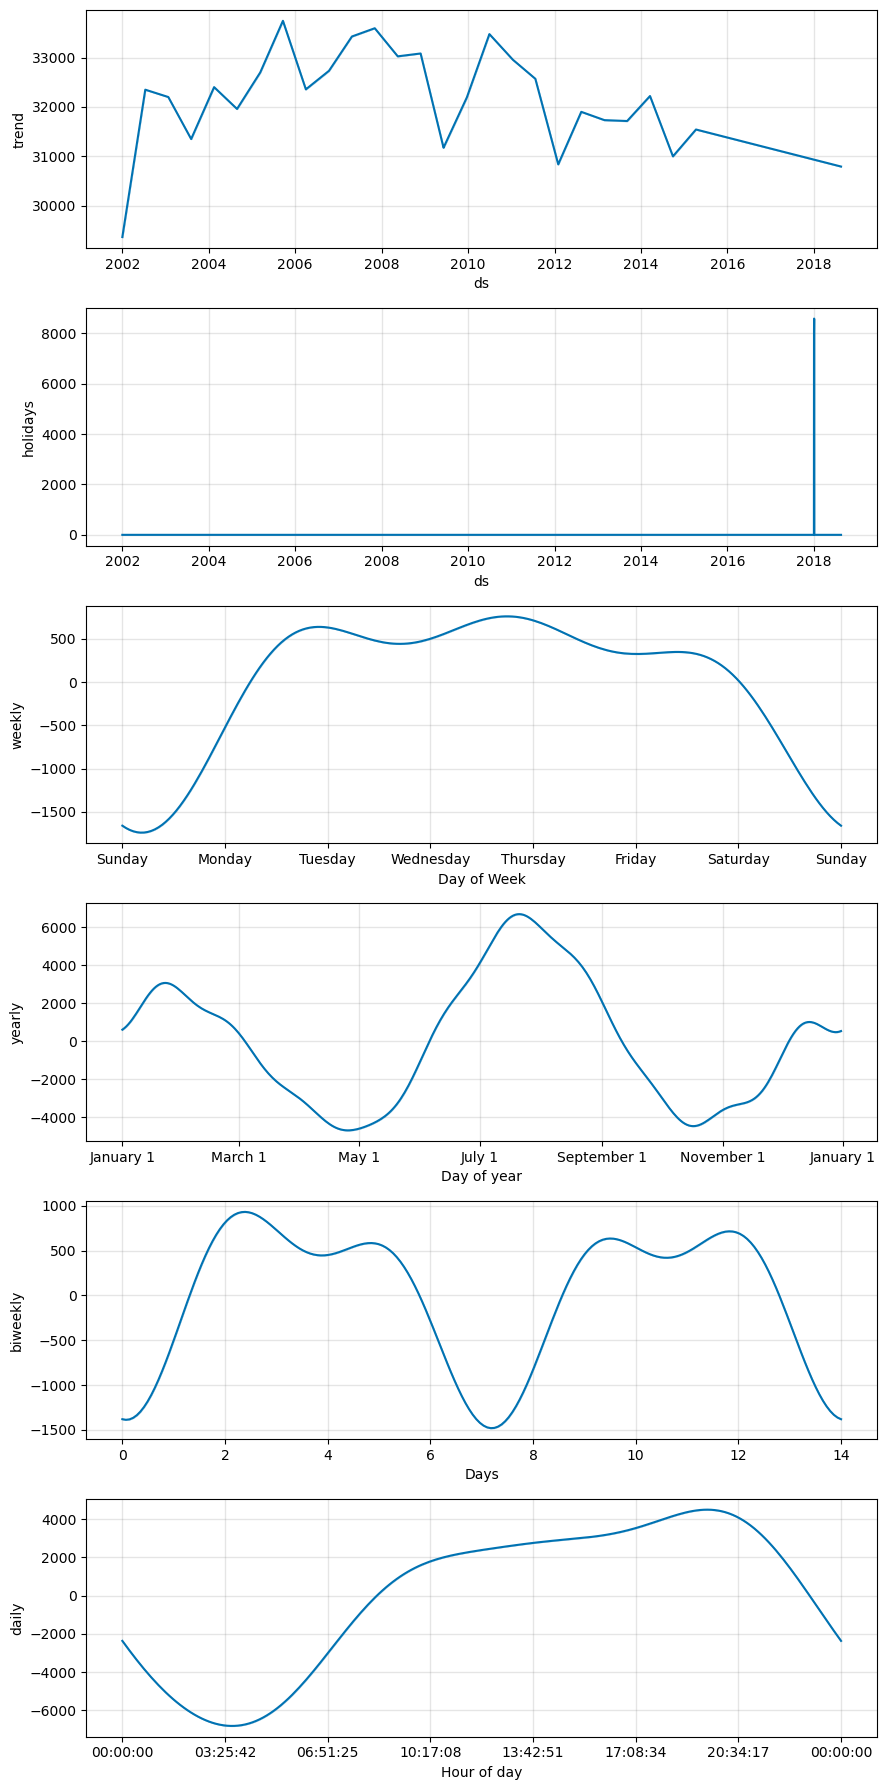

In [30]:
fig2 = model.plot_components(forecast)
plt.show()

In [31]:
import pickle
with open('prophet_energy.pkl', 'wb') as f:
    pickle.dump(model, f)